# Name- Pritesh Ranjan
# Reg - 21MAI0036

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Train-Test Split
from sklearn.model_selection import train_test_split
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# For model evaulation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [13]:
df = pd.read_csv("weather.csv")
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30,SW,NW,6,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39,E,W,4,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85,N,NNE,6,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54,WNW,W,30,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50,SSE,ESE,20,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       366 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  366 non-null    int64  
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   366 non-null    int64  
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

# Data Preprocessing

## Cleaning



In [15]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30,SW,NW,6,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39,E,W,4,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85,N,NNE,6,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54,WNW,W,30,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50,SSE,ESE,20,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [16]:
# Class Names
class_names = {'Yes':0, 'No':1}
# Remove User ID
df.drop('WindGustDir', axis = 1, inplace = True)
df.drop('WindDir9am', axis = 1, inplace = True)
df.drop('WindDir3pm', axis = 1, inplace = True)
# Encoding Gender
df.replace({'Yes':1, 'No':0}, inplace = True)

df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,30,6,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,39,4,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,85,6,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,54,30,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,50,20,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


## Train-Test Split

We are going to  split the dataset into training set and testing set with a test_size of $20\%$

In [22]:
# variable Separation
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
sc = StandardScaler()
X = sc.fit_transform(X)
# Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# results
print("X_train: ",np.shape(X_train))
print("y_train: ",np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train:  (292, 18)
y_train:  (292,)
X_test: (74, 18)
y_test: (74,)


# Dimensionality Reduction

Here we want to build a classifier using only 2 features but we have 3. Using __Principal Component Analysis__ we will reduce the 3 features into 2 principal components such that maximum variation is captured by the PCA.

In [23]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
## results of 
print('Variance Captured by PCA')
for i in np.arange(pca.n_components_):
    print("PC{0:d}: {1:.1f}%".format(i+1, 100*pca.explained_variance_ratio_[i]))

Variance Captured by PCA
PC1: 30.1%
PC2: 22.3%


In [24]:
def AUC_ROC(model,X_train, X_test, y_train, y_test) :
    # Training Data
    y_train_prob = model.predict_proba(X_train)
    fpr1, tpr1, thres1 = roc_curve(y_train, y_train_prob[:,1], pos_label = 1)
    auc1 = auc(fpr1, tpr1)
    # testing Data
    y_test_prob = model.predict_proba(X_test)
    fpr2, tpr2, thres2 = roc_curve(y_test, y_test_prob[:,1], pos_label = 1)
    auc2= auc(fpr2, tpr2)
    #plotting
    plt.figure(figsize = (8,6))
    plt.plot(fpr1, tpr1, label = "Training: AUC-ROC = {0:.3f}".format(auc1),
             color = "tab:orange")
    plt.plot(fpr2, tpr2, label = "Testing: AUC-ROC = {0:.3f}".format(auc2),
             color = 'tab:blue')
    plt.plot(fpr1, fpr1, label = "FPR = TPR", color = 'black', linewidth=0.5)
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title("ROC Curve for " + model.__class__.__name__)
    plt.legend(loc = "lower right")
    plt.grid(which = 'both', axis = 'both')
    plt.show()
    pass

## Confusion Matrix

The __Confusion Matrix__ is a $2 \times 2$ matrix which stores all the number of occurences of each of the four outcomes of the Model. The columns represent the actual class labels and the rows represent predcited class labels thus cell representing the count of that outcome. The diagonal elements are correct predictions whereas off-diagonal elements represent error predctions.

In [25]:
def cm_Heatmap(y_true, y_pred, class_name = np.unique(y_train)) :
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    cm = pd.DataFrame(cm, columns = class_name, index = class_name)
    # Plotting
    plt.figure(figsize = (8,6))
    sns.heatmap(cm, annot = True, annot_kws = {'size': 20}, fmt = 'd', cmap = 'Greens')
    plt.xlabel('Observed Class')
    plt.ylabel('Predicted Class')
    plt.title('Confusion Matrix')
    plt.show()
    pass

# Logistic Regression

The logistic regression is called a regression and not classifier because it primarily predicts the probabilitiy of on observation being positive rather than the actual class. It is a linear binary classifier

In [26]:
# Training the Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# Training Reprto
print(classification_report(y_train, log_reg.predict(X_train), target_names = class_names))

              precision    recall  f1-score   support

         Yes       0.89      0.97      0.93       240
          No       0.74      0.44      0.55        52

    accuracy                           0.87       292
   macro avg       0.82      0.70      0.74       292
weighted avg       0.86      0.87      0.86       292



In [51]:
train_log = log_reg.score(X_train,y_train)
test_log = log_reg.score(X_test,y_test)

## 1. Confusion Matrix

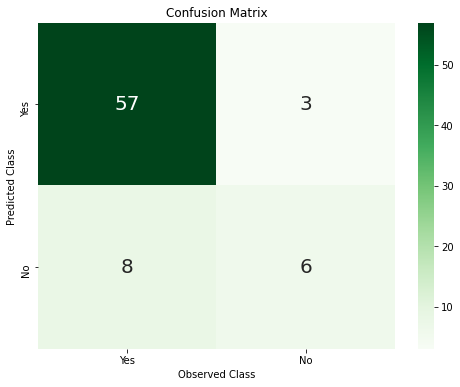

In [27]:
# test data
cm_Heatmap(y_test, log_reg.predict(X_test), class_names)

## 2. Classification Report

In [28]:
# Classification report
print(classification_report(y_test, log_reg.predict(X_test), target_names = class_names))

              precision    recall  f1-score   support

         Yes       0.88      0.95      0.91        60
          No       0.67      0.43      0.52        14

    accuracy                           0.85        74
   macro avg       0.77      0.69      0.72        74
weighted avg       0.84      0.85      0.84        74



## 3. AUC-ROC Curve

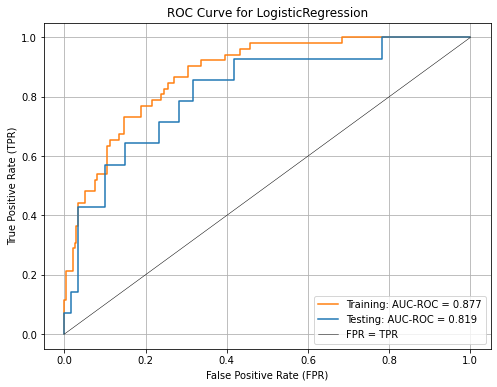

In [29]:
AUC_ROC(log_reg, X_train, X_test, y_train, y_test)

## 4. Results (on Test data)

- __Sensitivity__: $77\%$
- __Specificity__: $98\%$
- __AUC ROC__: $0.973$

# k-Nearest Neighbors

It is a non-parametric non-linear classifier. the k-NN model does not need training rather the real computation cost is when we make predictions. Lets say we want to predict the class of a new observation, the model search for the $k$ nearest observations, based on some similarity metric, count the number of observations belonging to each class and label the new observation as the class which has the highest occurence among $k$ observations.

In [30]:
# Training model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
# Training report
print(classification_report(y_train, knn.predict(X_train), target_names = class_names))

              precision    recall  f1-score   support

         Yes       0.91      0.96      0.93       240
          No       0.75      0.58      0.65        52

    accuracy                           0.89       292
   macro avg       0.83      0.77      0.79       292
weighted avg       0.88      0.89      0.88       292



In [53]:
train_knn = knn.score(X_train,y_train)
test_knn = knn.score(X_test,y_test)

## 1. Confusion Matrix

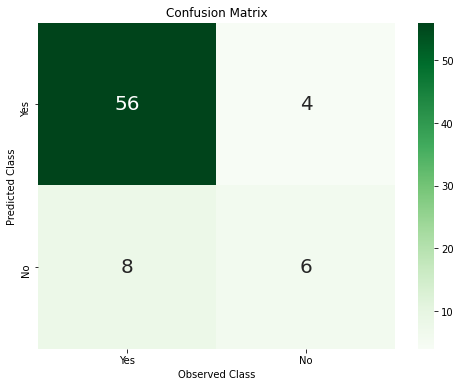

In [31]:
cm_Heatmap(y_test, knn.predict(X_test), class_names)

## 2. Classification Report

In [32]:
print(classification_report(y_test, knn.predict(X_test), target_names = class_names))

              precision    recall  f1-score   support

         Yes       0.88      0.93      0.90        60
          No       0.60      0.43      0.50        14

    accuracy                           0.84        74
   macro avg       0.74      0.68      0.70        74
weighted avg       0.82      0.84      0.83        74



## 3. AUC-ROC Curve

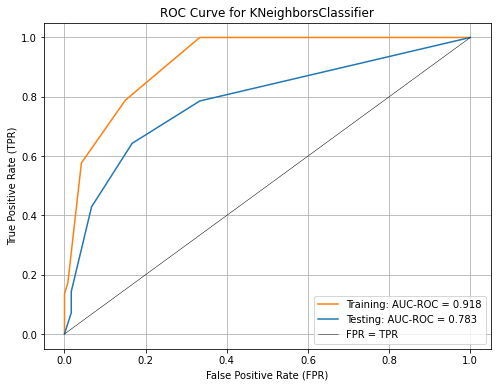

In [33]:
AUC_ROC(knn, X_train, X_test, y_train, y_test)

## 4. Results (on Test data)

- __Sensitivity__: $93\%$
- __Specificity__: $92\%$
- __AUC ROC__: $0.973$

# Decision Tree Classifier

The Decision tree Classifier is a tree based classifier. This model splits observations on the basis of their entropy. Every split is done so that entropy is maximized.

In [34]:
# Training model
dtc = DecisionTreeClassifier(max_depth = 4)
dtc.fit(X_train, y_train)
## Trainign report
print(classification_report(y_train, dtc.predict(X_train), target_names = class_names))

              precision    recall  f1-score   support

         Yes       0.91      0.98      0.95       240
          No       0.88      0.58      0.70        52

    accuracy                           0.91       292
   macro avg       0.90      0.78      0.82       292
weighted avg       0.91      0.91      0.90       292



In [55]:
train_dtc = dtc.score(X_train,y_train)
test_dtc = dtc.score(X_test,y_test)

## 1. Confusion Matrix

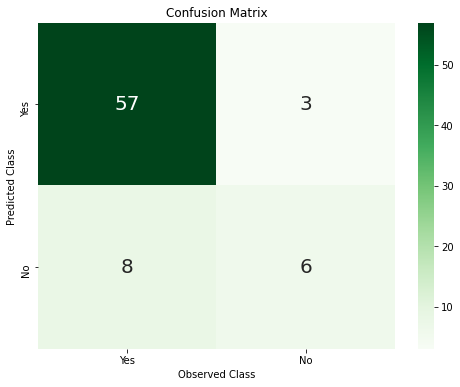

In [35]:
# test data
cm_Heatmap(y_test, dtc.predict(X_test), class_names)

## 2. Classification Report

In [36]:
# Classification report
print(classification_report(y_test, dtc.predict(X_test), target_names = class_names))

              precision    recall  f1-score   support

         Yes       0.88      0.95      0.91        60
          No       0.67      0.43      0.52        14

    accuracy                           0.85        74
   macro avg       0.77      0.69      0.72        74
weighted avg       0.84      0.85      0.84        74



## 3. AUC-ROC

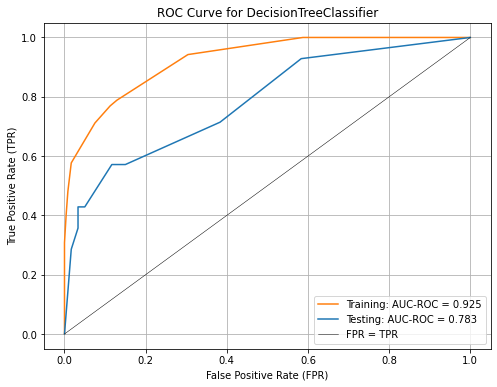

In [37]:
AUC_ROC(dtc, X_train, X_test, y_train, y_test)

## 4. Results (on Test data)

- __Sensitivity__: $87\%$
- __Specificity__: $92\%$
- __AUC ROC__: $0.918$

# Random Forest Classifier

Random Forest Classifier is an ensemble learning algorithm which means that several simpler algorithms, Decision Tree Classifier, in this case are used to build the model. Generally Random Forest Classifiers are used for larger and complex datasets. Unlike in Decision Tree Classifier, here every tree has to work with a random subset of features rather than working with the complete set of features. This is done to avoid Overfitting.

In [38]:
# Training model
rfc = RandomForestClassifier(n_estimators = 50, max_depth = 3)
rfc.fit(X_train, y_train)
# Training report
print(classification_report(y_train, rfc.predict(X_train), target_names = class_names))

              precision    recall  f1-score   support

         Yes       0.89      0.97      0.93       240
          No       0.79      0.44      0.57        52

    accuracy                           0.88       292
   macro avg       0.84      0.71      0.75       292
weighted avg       0.87      0.88      0.87       292



In [56]:
train_rfc = rfc.score(X_train,y_train)
test_rfc = rfc.score(X_test,y_test)

## 1. Confusion Matrix

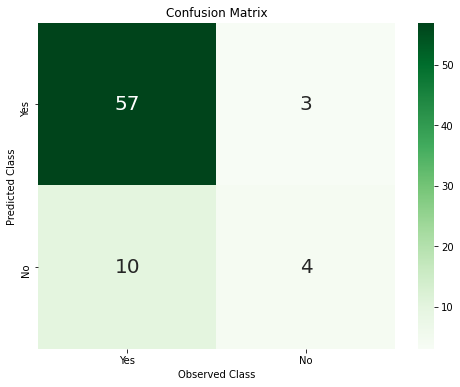

In [39]:
cm_Heatmap(y_test, rfc.predict(X_test), class_names)

## 2. Classification Report

In [40]:
print(classification_report(y_test, rfc.predict(X_test), target_names = class_names))

              precision    recall  f1-score   support

         Yes       0.85      0.95      0.90        60
          No       0.57      0.29      0.38        14

    accuracy                           0.82        74
   macro avg       0.71      0.62      0.64        74
weighted avg       0.80      0.82      0.80        74



## 3. AUC-ROC Curve

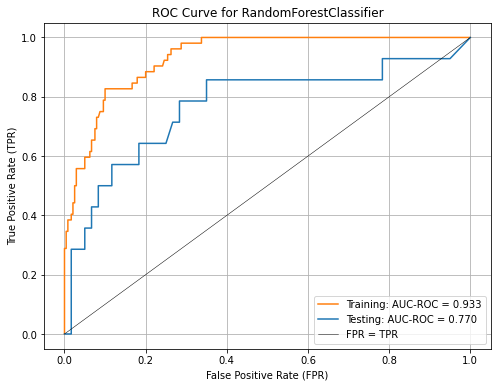

In [41]:
AUC_ROC(rfc, X_train, X_test, y_train, y_test)

## 4. Results (on Test data)

- __Sensitivity__: $97\%$
- __Specificity__: $92\%$
- __AUC ROC__: $0.972$

# Naive Bayes Classifier

This is a Bayesian approach of classification. At we we have to assign certain probabilities to individual classes called the __prior probabilities__ and using the training data, we have to update these probabilities to obtain the __posterior probability__ distribution. Using this probability distribution we can classify a new observation.

In [42]:
# Training model
nbc = GaussianNB(priors = np.array([0.5, 0.5]))
nbc.fit(X_train, y_train)
# Training report
print(classification_report(y_train, nbc.predict(X_train), target_names = class_names))

              precision    recall  f1-score   support

         Yes       0.94      0.84      0.89       240
          No       0.51      0.75      0.60        52

    accuracy                           0.83       292
   macro avg       0.72      0.80      0.75       292
weighted avg       0.86      0.83      0.84       292



In [57]:
train_nbc = nbc.score(X_train,y_train)
test_nbc = nbc.score(X_test,y_test)

## 1. Confusion Matrix

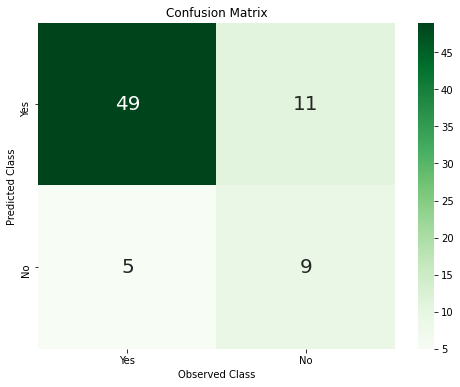

In [43]:
cm_Heatmap(y_test, nbc.predict(X_test), class_names)

## 2. Classification Report

In [44]:
print(classification_report(y_test, nbc.predict(X_test), target_names = class_names))

              precision    recall  f1-score   support

         Yes       0.91      0.82      0.86        60
          No       0.45      0.64      0.53        14

    accuracy                           0.78        74
   macro avg       0.68      0.73      0.69        74
weighted avg       0.82      0.78      0.80        74



## 3. AUC-ROC Curve

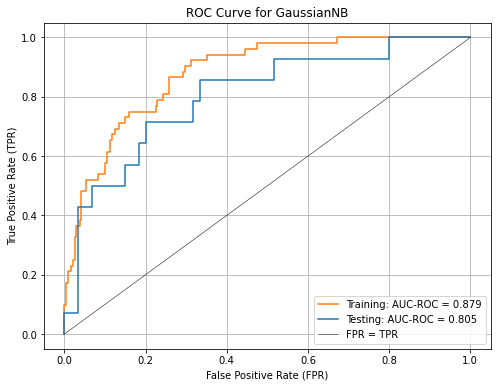

In [45]:
AUC_ROC(nbc, X_train, X_test, y_train, y_test)

## 4. Results (on Test data)

- __Sensitivity__: $100\%$
- __Specificity__: $90\%$
- __AUC ROC__: $0.985$

# Support Vector Machines

SVMs are based on the idea of finding a hyperplane which separates the data. Hyperplane is a general term for a __line__ in 2-D space or a __plane__ in 3-D space

In [46]:
svmc = SVC(probability = True)
# Training the Model
svmc.fit(X_train, y_train)
# Training Report
print(classification_report(y_train, svmc.predict(X_train), target_names = class_names))

              precision    recall  f1-score   support

         Yes       0.87      0.97      0.92       240
          No       0.72      0.35      0.47        52

    accuracy                           0.86       292
   macro avg       0.80      0.66      0.69       292
weighted avg       0.85      0.86      0.84       292



In [59]:
train_svmc = svmc.score(X_train,y_train)
test_svmc = svmc.score(X_test,y_test)

## 1. Confusion Matrix

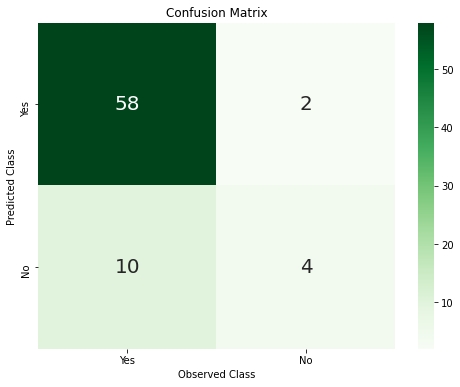

In [47]:
cm_Heatmap(y_test, svmc.predict(X_test), class_names)

## 2. Classification Report

In [48]:
print(classification_report(y_test, svmc.predict(X_test), target_names = class_names))

              precision    recall  f1-score   support

         Yes       0.85      0.97      0.91        60
          No       0.67      0.29      0.40        14

    accuracy                           0.84        74
   macro avg       0.76      0.63      0.65        74
weighted avg       0.82      0.84      0.81        74



## 3. AUC-ROC Curve

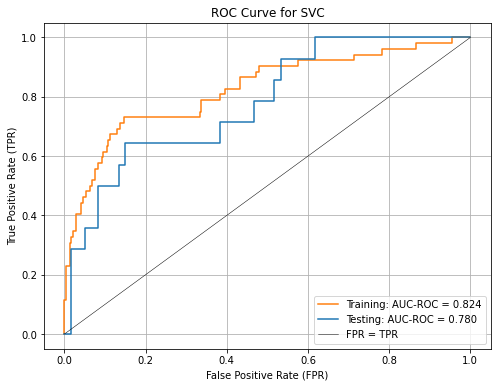

In [49]:
AUC_ROC(svmc, X_train, X_test, y_train, y_test)

## 4. Results (on Test data)

- __Sensitivity__: $100\%$
- __Specificity__: $90\%$
- __AUC ROC__: $0.971$

In [62]:
train_accuracy=[train_log,train_knn,train_dtc,train_rfc,train_nbc,train_svmc]
test_accuracy=[test_log,test_knn,test_dtc,test_rfc,test_nbc,test_svmc]

col={'Train Accuracy':train_accuracy,'Test Accuracy':test_accuracy}
models=['Logistic Regression','Knn','Decision Tree','Random Forest','Naive Bayes','Support Vector Machine']
d=pd.DataFrame(data=col,index=models)
d

,Train Accuracy,Test Accuracy
Logistic Regression,0.873288,0.851351
Knn,0.890411,0.837838
Decision Tree,0.910959,0.851351
Random Forest,0.880137,0.824324
Naive Bayes,0.825342,0.783784
Support Vector Machine,0.859589,0.837838


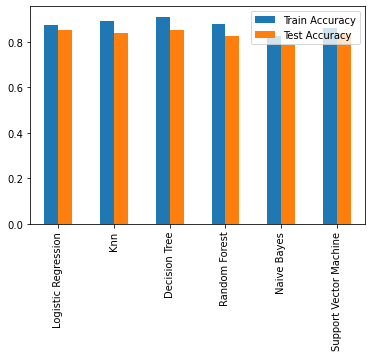

In [65]:
d.plot(kind='bar')
plt.show()

# Conclusion

| Model Name               | Sensitivity | Specificity | AUC ROC |
| ------------------------ | ----------- | ----------- | ------- |
| Logistic Regression      | $77\%$      | $98\%$      | $0.973$ |
| k-Nearest Neighbors      | $93\%$      | $92\%$      | $0.973$ |
| Decision Tree Classifier | $87\%$      | $92\%$      | $0.918$ |
| Random Forest Classifier | $97\%$      | $92\%$      | $0.972$ |
| Naive Bayes              | $100\%$     | $90\%$      | $0.985$ |
| Support Vector Machines  | $100\%$     | $90\%$      | $0.971$ |

- It seems that Naive Bayes classifier is the optimum model for this dataset, with the highest AUC ROC value.
- When detection of Not-Purchased is more important, the Logistic Regression is the best, with the highest Specificity.